In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to detect R-peaks (QRS complexes)
from scipy.signal import find_peaks

# Load the ECG signal data from the CSV file
file_path = 'ecg_signal.csv'
ecg_data = pd.read_csv(file_path)
# Assuming the column name is 'voltage'; modify it if necessary
voltage_column = 'Voltage'

# Define the sampling rate (samples per second)
sampling_rate = 1000  # Adjust to your actual sampling rate

In [2]:
def detect_qrs_peaks(ecg_signal):
    peaks, _ = find_peaks(ecg_signal, height=0.6, distance=sampling_rate / 2)
    return peaks

# Function to calculate heart rate
def calculate_heart_rate(qrs_peaks):
    rr_intervals = np.diff(qrs_peaks) / sampling_rate
    heart_rate = 60 / np.mean(rr_intervals)
    return heart_rate

# Function to calculate time periods
def calculate_time_periods(qrs_peaks):
    p_periods, qrs_periods, t_periods = [], [], []
    for i in range(len(qrs_peaks) - 1):
        start = qrs_peaks[i]
        end = qrs_peaks[i + 1]
        
        # P wave: Typically before QRS complex
        p_peak = max(start - int(0.15 * sampling_rate), 0)
        p_periods.append(qrs_peaks[i] - p_peak)
        
        # QRS complex: From R-peak to the next R-peak
        qrs_periods.append(end - start)
        
        # T wave: Typically after QRS complex
        t_peak = min(end + int(0.25 * sampling_rate), len(ecg_data))
        t_periods.append(t_peak - end)
    
    return p_periods, qrs_periods, t_periods

In [3]:
# Detect QRS peaks
qrs_peaks = detect_qrs_peaks(ecg_data[voltage_column])

# Calculate heart rate
heart_rate = calculate_heart_rate(qrs_peaks)

# Print heart rate
print(f"Heart Rate: {heart_rate} BPM")

Heart Rate: 99.36492850045364 BPM


In [4]:
# Calculate time periods
p_periods, qrs_periods, t_periods = calculate_time_periods(qrs_peaks)

# Print time periods
print(f"P Wave Periods: {p_periods}")
print(f"QRS Complex Periods: {qrs_periods}")
print(f"T Wave Periods: {t_periods}")


P Wave Periods: [150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150]
QRS Complex Periods: [634, 642, 656, 656, 652, 631, 606, 596, 580, 578, 601, 615, 640, 665, 641, 606, 584, 618, 616, 636, 616, 595, 585, 578, 572, 566, 561, 564, 584, 616, 669, 677, 733, 708, 677, 632, 609, 595, 597, 594, 588, 583, 596, 604, 625, 618, 605, 617, 599, 589, 576, 572, 576, 586, 579, 575, 569, 569, 587, 607, 604, 612, 614, 620, 610, 608, 599, 596, 582, 576, 584, 581, 599, 592, 601, 610, 614, 6

In [5]:
# Calculate average time periods
average_p_period = np.mean(p_periods)
average_qrs_period = np.mean(qrs_periods)
average_t_period = np.mean(t_periods)

# Print average time periods
print(f"Average P Wave Period: {average_p_period} milliseconds")
print(f"Average QRS Complex Period: {average_qrs_period} milliseconds")
print(f"Average T Wave Period: {average_t_period} milliseconds")

Average P Wave Period: 150.0 milliseconds
Average QRS Complex Period: 603.8347826086956 milliseconds
Average T Wave Period: 250.0 milliseconds


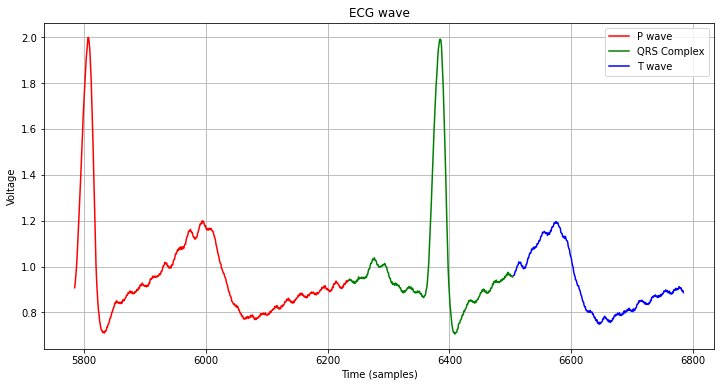

In [6]:
# Function to calculate time periods
def detect_waves(qrs_peaks, index):
    start = qrs_peaks[index]
    end = qrs_peaks[index + 1]
    
    # P wave: Typically before QRS complex
    p_peak_start = max(start - int(0.6 * sampling_rate), 0)
    p_peak_end = max(start - int(0.15 * sampling_rate), 0)
    p_wave = ecg_data[voltage_column][p_peak_start:p_peak_end]
    
    qrs_peak_end = max(start + int(0.12 * sampling_rate), 0)
    # QRS complex: From R-peak to the next R-peak
    qrs_wave = ecg_data[voltage_column][p_peak_end:qrs_peak_end]
    
    # T wave: Typically after QRS complex
    t_peak = min(start + int(0.4 * sampling_rate), len(ecg_data))
    t_wave = ecg_data[voltage_column][qrs_peak_end:t_peak]
    
    return p_wave, qrs_wave, t_wave

# Detect QRS peaks
qrs_peaks = detect_qrs_peaks(ecg_data[voltage_column])

# Select an index (change this index to the QRS complex you want to visualize)
selected_index = 10

# Calculate time periods for the selected QRS complex
p_wave, qrs_wave, t_wave = detect_waves(qrs_peaks, selected_index)

# Plot the P, QRS, and T waves for one complete PQRST wave
plt.figure(figsize=(12, 6))
plt.plot(p_wave, label='P wave', color='red')
plt.plot(qrs_wave, label='QRS Complex', color='green')
plt.plot(t_wave, label='T wave', color='blue')
plt.title('ECG wave')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()


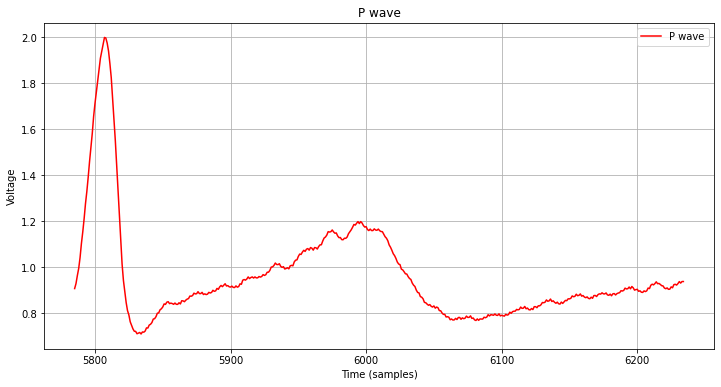

In [7]:
# Plot the P, QRS, and T waves for one complete PQRST wave
plt.figure(figsize=(12, 6))
plt.plot(p_wave, label='P wave', color='red')
plt.title('P wave')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

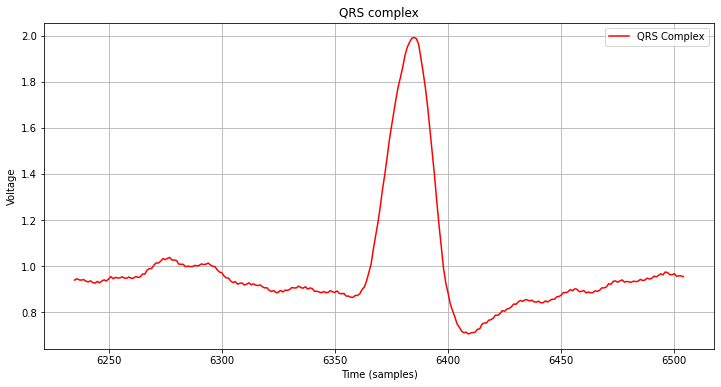

In [8]:
# Plot the P, QRS, and T waves for one complete PQRST wave
plt.figure(figsize=(12, 6))
plt.plot(qrs_wave, label='QRS Complex', color='red')
plt.title('QRS complex')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

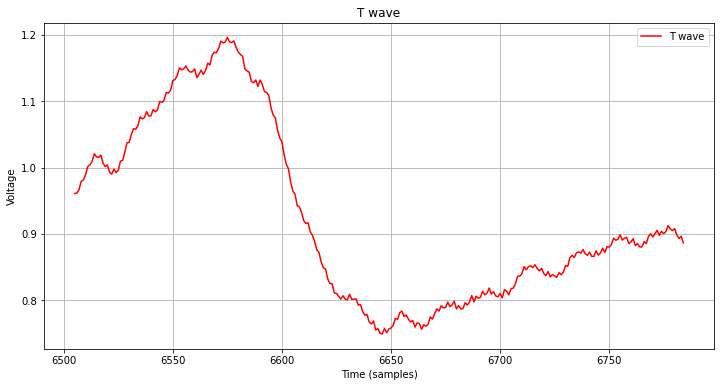

In [9]:
# Plot the P, QRS, and T waves for one complete PQRST wave
plt.figure(figsize=(12, 6))
plt.plot(t_wave, label='T wave', color='red')
plt.title('T wave')
plt.xlabel('Time (samples)')
plt.ylabel('Voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

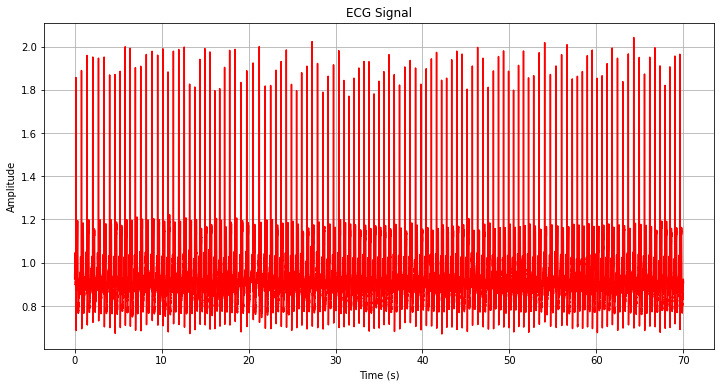

In [10]:
# Calculate time values in seconds
time = np.arange(0, len(ecg_data) / sampling_rate, 1 / sampling_rate)

# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data, color='red')
plt.title('ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
